# Data Exploration
Get first look of data and do cleaning if necessary

In [46]:
# import libraries
import os
import json
import requests
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="whitegrid")

In [13]:
# import data
df = pd.read_csv('data/tracks.csv', index_col=False)
df.drop(columns={'Unnamed: 0'}, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1006 non-null   int64  
 1   track_id          1006 non-null   object 
 2   track_name        1006 non-null   object 
 3   artist_name       1006 non-null   object 
 4   popularity        1006 non-null   int64  
 5   genre             1006 non-null   object 
 6   danceability      1006 non-null   float64
 7   energy            1006 non-null   float64
 8   key               1006 non-null   float64
 9   loudness          1006 non-null   float64
 10  mode              1006 non-null   float64
 11  speechiness       1006 non-null   float64
 12  acousticness      1006 non-null   float64
 13  instrumentalness  1006 non-null   float64
 14  liveness          1006 non-null   float64
 15  valence           1006 non-null   float64
 16  tempo             1006 non-null   float64


In [16]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03,1006.000000
mean,58.822068,0.577644,0.601905,5.427435,-9.557434,0.606362,0.081795,0.285495,0.220686,0.173060,0.456648,118.844985,2.361563e+05,3.893638
std,20.910022,0.173383,0.273462,3.530986,6.623125,0.488799,0.084915,0.347711,0.355551,0.135360,0.234672,29.481083,9.972840e+04,0.415639
min,0.000000,0.000000,0.001590,0.000000,-45.008000,0.000000,0.000000,0.000009,0.000000,0.028300,0.000000,0.000000,4.282700e+04,0.000000
25%,52.000000,0.468250,0.442500,2.000000,-11.026250,0.000000,0.036725,0.009993,0.000003,0.092925,0.258250,95.928250,1.796565e+05,4.000000
50%,59.000000,0.583000,0.650000,5.000000,-7.676500,1.000000,0.047600,0.104500,0.000919,0.118000,0.459000,119.962000,2.165330e+05,4.000000
75%,75.000000,0.703000,0.826750,9.000000,-5.399750,1.000000,0.082700,0.483750,0.374250,0.204000,0.619000,137.978250,2.707838e+05,4.000000
max,96.000000,0.964000,0.998000,11.000000,0.832000,1.000000,0.591000,0.996000,0.978000,0.958000,0.969000,205.981000,1.367093e+06,5.000000


### Get Duplicates

In [26]:
df[df[['track_name', 'artist_name']].duplicated()]

,track_id,track_name,artist_name,popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
10,3OHfY25tqY28d16oZczHc8,Kill Bill,SZA,92,rap,0.644,0.72800,8.0,-5.750,1.0,0.0351,0.05430,0.169000,0.1610,0.430,88.993,153947.0,4.0
227,5W3m4W9HAfdbpQxPWfrP4t,In the End,Linkin Park,1,metal,0.555,0.84400,3.0,-6.567,0.0,0.0553,0.00818,0.000000,0.0895,0.464,105.193,216800.0,4.0
228,4UXGrkJEfKtiS0XriOvVDg,Lost,Linkin Park,5,metal,0.596,0.79800,0.0,-4.630,1.0,0.0285,0.00412,0.000000,0.3380,0.459,105.010,199342.0,4.0
229,0qk3YAp2K0VFL4LqRxA4Be,In the End,Linkin Park,2,metal,0.555,0.84400,3.0,-6.567,0.0,0.0553,0.00818,0.000000,0.0895,0.464,105.193,216800.0,4.0
230,3UejqBR0sgEPB05PYGmP04,Lost,Linkin Park,1,metal,0.596,0.79800,0.0,-4.630,1.0,0.0285,0.00412,0.000000,0.3380,0.459,105.010,199342.0,4.0
231,3ZbmBVydHUpaPftVEUezth,Lost,Linkin Park,1,metal,0.596,0.79800,0.0,-4.630,1.0,0.0285,0.00412,0.000000,0.3380,0.459,105.010,199342.0,4.0
232,1RpQaclaUlzWTYKvt4nCLw,Lost,Linkin Park,0,metal,0.596,0.79800,0.0,-4.630,1.0,0.0285,0.00412,0.000000,0.3380,0.459,105.010,199342.0,4.0
233,6968at6IEPY4y8ymNErJkI,Lost,Linkin Park,2,metal,0.596,0.79800,0.0,-4.630,1.0,0.0285,0.00412,0.000000,0.3380,0.459,105.010,199342.0,4.0
404,2GH5jo15wbTv1Ll7zXEzSg,Fantasy,"Earth, Wind & Fire",59,jazz,0.608,0.74500,4.0,-8.772,0.0,0.0857,0.32300,0.004280,0.1350,0.614,88.941,277413.0,4.0
405,2GH5jo15wbTv1Ll7zXEzSg,Fantasy,"Earth, Wind & Fire",59,funk,0.608,0.74500,4.0,-8.772,0.0,0.0857,0.32300,0.004280,0.1350,0.614,88.941,277413.0,4.0


In [28]:
df[df[['track_name']].duplicated()]

,track_id,track_name,artist_name,popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
10,3OHfY25tqY28d16oZczHc8,Kill Bill,SZA,92,rap,0.644,0.72800,8.0,-5.750,1.0,0.0351,0.054300,0.169000,0.1610,0.4300,88.993,153947.0,4.0
227,5W3m4W9HAfdbpQxPWfrP4t,In the End,Linkin Park,1,metal,0.555,0.84400,3.0,-6.567,0.0,0.0553,0.008180,0.000000,0.0895,0.4640,105.193,216800.0,4.0
228,4UXGrkJEfKtiS0XriOvVDg,Lost,Linkin Park,5,metal,0.596,0.79800,0.0,-4.630,1.0,0.0285,0.004120,0.000000,0.3380,0.4590,105.010,199342.0,4.0
229,0qk3YAp2K0VFL4LqRxA4Be,In the End,Linkin Park,2,metal,0.555,0.84400,3.0,-6.567,0.0,0.0553,0.008180,0.000000,0.0895,0.4640,105.193,216800.0,4.0
230,3UejqBR0sgEPB05PYGmP04,Lost,Linkin Park,1,metal,0.596,0.79800,0.0,-4.630,1.0,0.0285,0.004120,0.000000,0.3380,0.4590,105.010,199342.0,4.0
231,3ZbmBVydHUpaPftVEUezth,Lost,Linkin Park,1,metal,0.596,0.79800,0.0,-4.630,1.0,0.0285,0.004120,0.000000,0.3380,0.4590,105.010,199342.0,4.0
232,1RpQaclaUlzWTYKvt4nCLw,Lost,Linkin Park,0,metal,0.596,0.79800,0.0,-4.630,1.0,0.0285,0.004120,0.000000,0.3380,0.4590,105.010,199342.0,4.0
233,6968at6IEPY4y8ymNErJkI,Lost,Linkin Park,2,metal,0.596,0.79800,0.0,-4.630,1.0,0.0285,0.004120,0.000000,0.3380,0.4590,105.010,199342.0,4.0
404,2GH5jo15wbTv1Ll7zXEzSg,Fantasy,"Earth, Wind & Fire",59,jazz,0.608,0.74500,4.0,-8.772,0.0,0.0857,0.323000,0.004280,0.1350,0.6140,88.941,277413.0,4.0
405,2GH5jo15wbTv1Ll7zXEzSg,Fantasy,"Earth, Wind & Fire",59,funk,0.608,0.74500,4.0,-8.772,0.0,0.0857,0.323000,0.004280,0.1350,0.6140,88.941,277413.0,4.0


In [20]:
df[df.duplicated()]

,track_id,track_name,artist_name,popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
404,2GH5jo15wbTv1Ll7zXEzSg,Fantasy,"Earth, Wind & Fire",59,jazz,0.608,0.745,4.0,-8.772,0.0,0.0857,0.3230,0.004280,0.135,0.614,88.941,277413.0,4.0
406,2GH5jo15wbTv1Ll7zXEzSg,Fantasy,"Earth, Wind & Fire",59,funk,0.608,0.745,4.0,-8.772,0.0,0.0857,0.3230,0.004280,0.135,0.614,88.941,277413.0,4.0
420,5N6pQ2vYtd3Rb9w7LC8PZ9,The Girl From Ipanema,Antônio Carlos Jobim,60,jazz,0.541,0.321,5.0,-14.418,1.0,0.0329,0.7140,0.003450,0.101,0.549,133.531,200360.0,4.0
422,5N6pQ2vYtd3Rb9w7LC8PZ9,The Girl From Ipanema,Antônio Carlos Jobim,60,classical,0.541,0.321,5.0,-14.418,1.0,0.0329,0.7140,0.003450,0.101,0.549,133.531,200360.0,4.0
754,5PTWlk21hqWnFu841NOp7k,I Give You My Heart,Mr. President,55,techno,0.744,0.933,4.0,-4.875,1.0,0.0329,0.0027,0.000315,0.114,0.911,145.977,215067.0,4.0
755,5PTWlk21hqWnFu841NOp7k,I Give You My Heart,Mr. President,55,techno,0.744,0.933,4.0,-4.875,1.0,0.0329,0.0027,0.000315,0.114,0.911,145.977,215067.0,4.0
756,5PTWlk21hqWnFu841NOp7k,I Give You My Heart,Mr. President,55,techno,0.744,0.933,4.0,-4.875,1.0,0.0329,0.0027,0.000315,0.114,0.911,145.977,215067.0,4.0


There appears to be multiple scenarios causing duplicates:
- Totally identical rows: Some songs are published multiple times e.g. in the original album release and best of compilation of a band. (Fantasy - Earth, Wind & Fire)
- Same song different versions: (Lost - Linkin Park) Probably original version, radio edit and remix under the same name.
- A song associated with multiple genres
- A joint song of multiple artists. Column `artist_name` respresent only one artists if it's a collab song and same track can come twice under each artist's name.

Strategy:
- Remove duplicates of `track_name` & `artist_name`.

In [31]:
print('Number of duplicate tracks:\t', len(df[df[['track_name']].duplicated()]))
df = df.drop_duplicates(['track_name', 'artist_name'], keep='first')

Number of duplicate tracks:	 37


In [40]:
print('Number of tracks by genre:')
df.groupby(by=['genre'])['genre'].count().sort_values()

Number of tracks per genre:


genre
funk           91
classical      93
metal          93
r&b            98
jazz           99
rap            99
techno         99
blues         100
electronic    100
rock          100
Name: genre, dtype: int64

In [49]:
print('Average values by genre')
genre_averages_df = df.groupby(by=['genre']).mean().sort_values(by='genre')
genre_averages_df.reset_index(drop=False, inplace=True)

Average values by genre


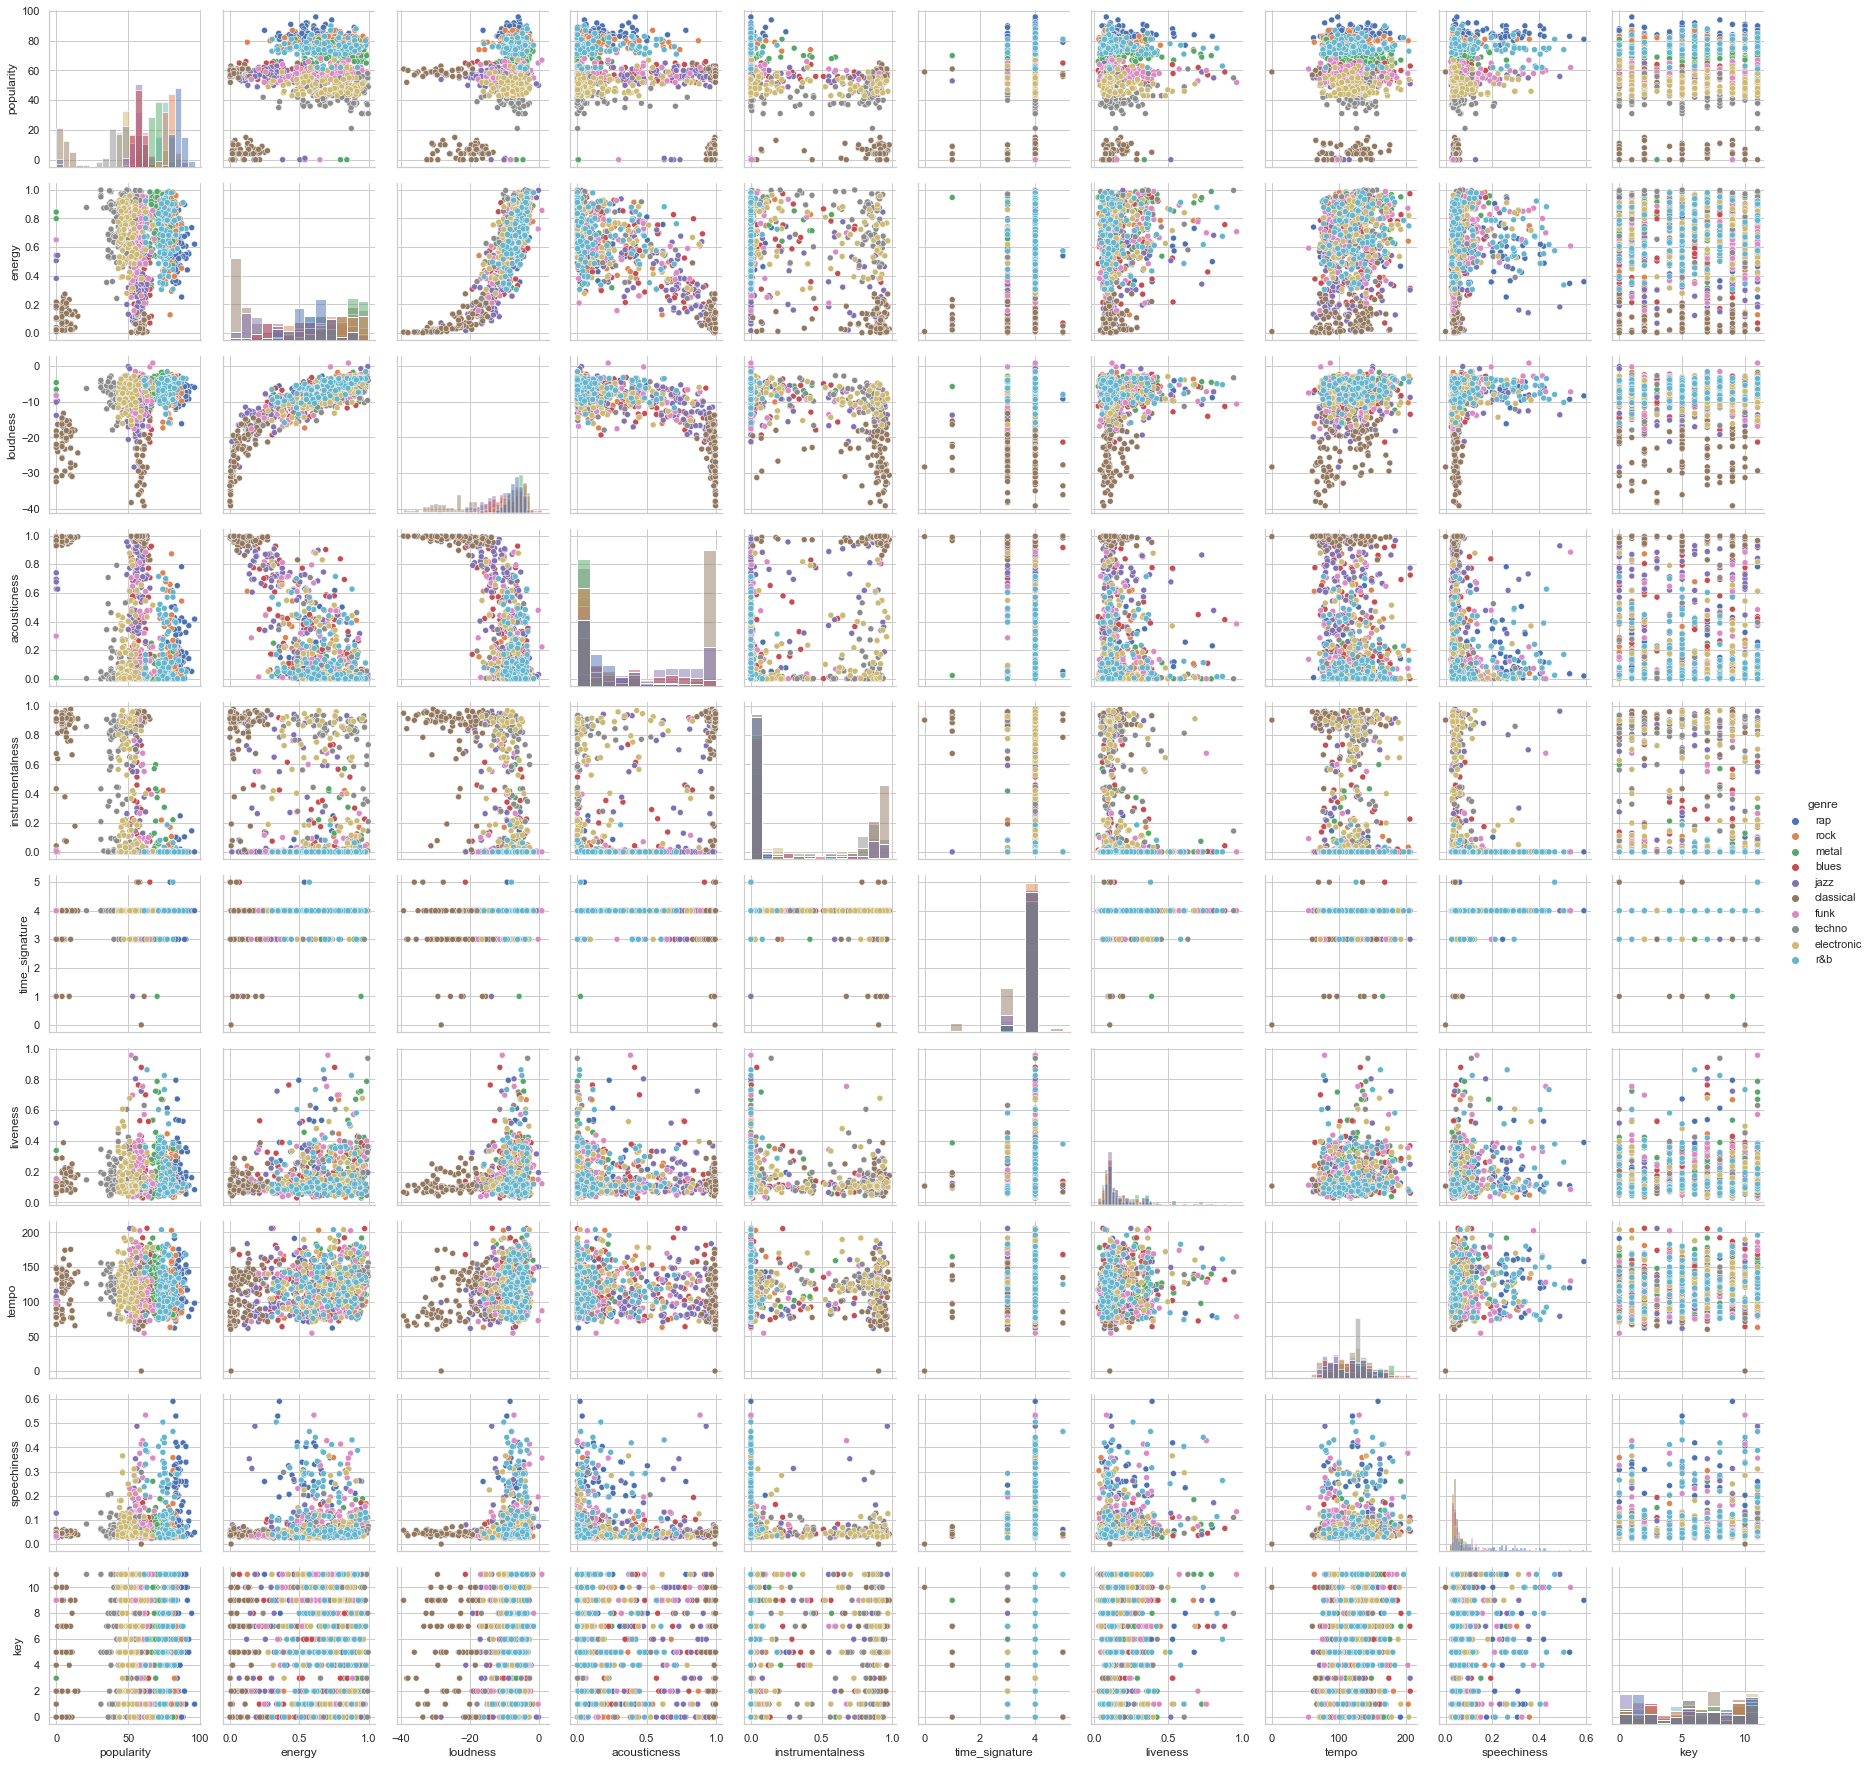

In [58]:
g = sns.PairGrid(df[['track_name', 'genre', 'popularity', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'time_signature', 'liveness', 'tempo', 'speechiness', 'key']], hue="genre")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()